In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab07.ipynb")

# Lab 7: Great British Bake Off (A/B Test)

Welcome to Data 8 Lab 7! This week's lab will focus on A/B Testing using data from the ever-popular British television show, [*The Great British Bakeoff*](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off).

**Lab Queue**: You can find the Lab Queue at [lab.data8.org](https://lab.data8.org/). Whenever you feel stuck or need some further clarification, add yourself to the queue to get help from a GSI or academic intern! Please list your name, location, and purpose on your ticket!

**Deadline**: If you are not attending lab, you have to complete this lab and submit by Wednesday, 10/20 before 8:59 A.M. PT in order to receive lab credit. Otherwise, please attend the lab you are enrolled in, get checked off with your GSI or academic intern **AND** submit this assignment by the end of the lab section (with whatever progress you've made) to receive lab credit.

**Submission**: Once you're finished, scroll up to the top of the page, and run every cell in the notebook.  Select "Save and Checkpoint" in the File menu (please don’t hit Save As), then rerun the last cell of the notebook.  The result will contain a zip file that you can submit to Gradescope. If you are in lab, you can submit a ticket on lab.data8.org to ask a staff member to check you off. 

First, set up the notebook by running the cell below.

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', (FutureWarning, np.VisibleDeprecationWarning))

import d8error

## 1. A/B Testing

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions. We may also refer to an A/B test as a permutation test.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step. Oftentimes, we use an A/B test to determine whether or not two samples came from the same underlying distribution.

**Question 1.1.** The following statements are the steps of an A/B hypothesis test presented in a *random order*:

1. Choose a test statistic (typically the difference in means between two categories)

2. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times

3. Find the value of the observed test statistic

4. Calculate the p-value based off your observed and simulated test statistics

5. Define a null and alternate model

6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis

Assign `ab_test_order` to an array of integers that contains the correct order of an A/B test, where the first item of the array is the first step of an A/B test and the last item of the array is the last step of an A/B test.

<!--
BEGIN QUESTION
name: q1_1
-->

In [5]:
ab_test_order = make_array(5, 1, 3, 2, 4, 6)

In [6]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** If the null hypothesis of an A/B test is correct, should the order of labels affect the differences in means between each group? Why do we shuffle labels in an A/B test? 

<!--
BEGIN QUESTION
name: q1_2
-->

_Type your answer here, replacing this text._

## 2. The Great British Bake Off

>"The Great British Bake Off (often abbreviated to Bake Off or GBBO) is a British television baking competition, produced by Love Productions, in which a group of amateur bakers compete against each other in a series of rounds, attempting to impress a group of judges with their baking skills" [Wikipedia](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off)

For every week of the competition, the judges assign one contestant the title "Star Baker". Ultimately, one winner is crowned every season. Using this information, we would like to investigate how winning Star Baker awards affects the odds of winning a season of the show.

**Question 2.1.** We want to know whether winning more Star Baker awards *causes* a change in likelihood of winning the season.  Why is it not sufficient to compare star baker rates for winners and losers?

<!--
BEGIN QUESTION
name: q2_1
-->

_Type your answer here, replacing this text._

### Running an Experiment

We are going to run the following hypothesis test to determine the association between winning and number of Star Baker awards. The population we are examining is every contestant from seasons 2 through 11 of GBBO. We are going to use the following null and alternative hypotheses:

**Null hypothesis:** The distribution of Star Baker awards between contestants who won their season and contestants who did not win their season is the same.

**Alternative hypothesis:** Contestants who win their season of the show will win more Star Baker awards on average.

Our alternative hypothesis is related to our suspicion that contestants who win more Star Baker awards are more skilled, so they are more likely to win the season.

**Question 2.2.** Should we use an A/B test to test these hypotheses? If yes, what is our "A" group and what is our "B" group?

<!--
BEGIN QUESTION
name: q2_2
-->

_Type your answer here, replacing this text._

Check your answers with your neighbors or a staff member before you move on to the next section.

The `bakers` table below describes the number of star baker awards each contest won and whether or not they won their season (`1` if they won, `0` if they did not win). The data was manually aggregated from Wikipedia for seasons 2-11 of the show. We randomized the order of rows as to not spoil the outcome of the show.

In [7]:
bakers = Table.read_table("star_bakers.csv")
bakers.show(3)

star baker awards,won
3,1
0,0
1,0


**Question 2.3.** Create a new table called `means` that contains the mean number of star baker awards for bakers who did not win (`won==0`) and bakers that did win (`won==1`). The table should have the column names `won` and `star baker awards mean`.
<!--
BEGIN QUESTION
name: q2_3
-->

In [10]:
means = bakers.group('won', np.average).relabeled(1, 'star baker awards mean')
means

won,star baker awards mean
0,0.651786
1,1.5


In [11]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** Visualize the distribution of Star Baker awards for winners and non-winners. You should use the bins we provided.

Hint: You will want to use the group argument of `tbl.hist`. In order to produce several overlayed histograms based on unique values in a given column, we can do something like `tbl.hist(..., group=<col_name>, bins=...)`!

<!--
BEGIN QUESTION
name: q2_4
-->

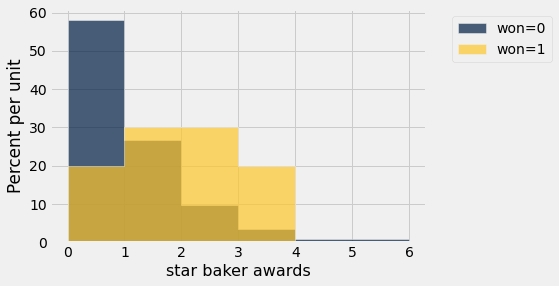

In [15]:
useful_bins = np.arange(0, 7)
bakers.hist(0, group = 'won', bins = useful_bins)

**Question 2.5.** We want to figure out if there is a difference between the distribution of Star Baker awards between winners and non winners. 

What should the test statistic be? Which values of this test statistic support the null, and which values support the alternative?

If you are in lab, confirm your answer with a neighbor or staff member before moving on.

<!--
BEGIN QUESTION
name: q2_5
-->

_Type your answer here, replacing this text._

**Question 2.6.** Set `observed_difference` to the observed test statistic using the `means` table. 

<!--
BEGIN QUESTION
name: q2_6
-->

In [18]:
observed_difference = means.column(1).item(1) - means.column(1).item(0)
observed_difference

0.8482142857142857

In [19]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7.** Given a table like `bakers`, a value column `label_col`, and a group column `group_col`, write a function that calculates the appropriate test statistic.

*Hint:* Make sure that you are taking the directionality of our alternative hypothesis into account.

<!--
BEGIN QUESTION
name: q2_7
-->

In [51]:
def find_test_stat(tbl, label_col, group_col):
    grouped_tbl = tbl.group(label_col, np.average)
    return grouped_tbl.column(1).item(1) - grouped_tbl.column(1).item(0)
find_test_stat(bakers, "won", "star baker awards")

0.8482142857142857

In [52]:
grader.check("q2_7")

q2_7 results: All test cases passed!

When we run a simulation for A/B testing, we resample by **shuffling the labels** of the original sample. If the null hypothesis is true and the star baker award distributions are the same, we expect that the difference in mean star baker awards will be not change when `"won"` labels are changed.

**Question 2.8.** Write a function `simulate_and_test_statistic` to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.

<!--
BEGIN QUESTION
name: q2_8
-->

In [48]:
shuffled_labels = bakers.sample().column('won')
shuffled_tbl = bakers.select('star baker awards').with_columns('won', shuffled_labels)
shuffled_tbl.show(10)
shuffled_labels

star baker awards,won
3,0
0,1
1,0
0,1
0,0
1,0
1,0
0,0
0,0
0,0


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [49]:
def simulate_and_test_statistic(tbl, labels_col, values_col):
    shuffled_labels = tbl.sample().column(1)
    shuffled_tbl = tbl.select('star baker awards').with_columns('won', shuffled_labels)
    return find_test_stat(shuffled_tbl, labels_col, values_col)

simulate_and_test_statistic(bakers, "won", "star baker awards")

-0.15303030303030296

In [50]:
grader.check("q2_8")

q2_8 results:
    q2_8 - 1 result:
        Test case passed!

    q2_8 - 2 result:
        Trying:
            np.random.seed(1)
        Expecting nothing
        ok
        Trying:
            test_stat2 = simulate_and_test_statistic(bakers, "won", "star baker awards")
        Expecting nothing
        ok
        Trying:
            np.round(test_stat2, 3) == -0.023 or np.round(test_stat2, 3) == -0.132
        Expecting:
            True
        **********************************************************************
        Line 3, in q2_8 1
        Failed example:
            np.round(test_stat2, 3) == -0.023 or np.round(test_stat2, 3) == -0.132
        Expected:
            True
        Got:
            False

**Question 2.9.** Simulate 5000 trials of our A/B test and store the test statistics in an array called `differences`.

<!--
BEGIN QUESTION
name: q2_9
-->

In [53]:
# This cell might take a couple seconds to run
differences = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    one_simulation = simulate_and_test_statistic(bakers, 'won', 'star baker awards')
    differences = np.append(differences, one_simulation)                                       
differences

array([-0.17895772,  0.29824561,  0.12424242, ...,  0.18092429,
        0.13141026, -0.20465773])

In [54]:
grader.check("q2_9")

q2_9 results: All test cases passed!

Run the cell below to view a histogram of your simulated test statistics plotted with your observed test statistic.

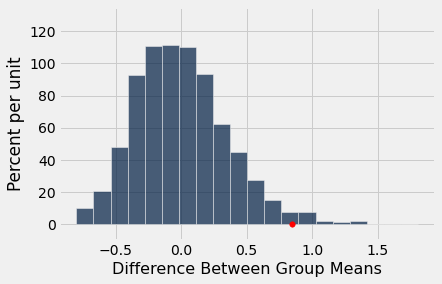

In [55]:
Table().with_column('Difference Between Group Means', differences).hist(bins=20)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=2)
plots.ylim(-0.1, 1.35);

**Question 2.10.** Find the p-value for your test and assign it to `empirical_p`.

<!--
BEGIN QUESTION
name: q2_10
-->

In [26]:
empirical_p = ...
empirical_p

In [ ]:
grader.check("q2_10")

**Question 2.11.** Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about the association between star baker awards and winning? What can you claim about causation from your statistical analysis?

<!--
BEGIN QUESTION
name: q2_10
-->

_Type your answer here, replacing this text._

## 3. Project 2 Partner Form

Project 2 will be released Friday, 10/22! You have the option of working with a partner that is enrolled in your lab. Your GSI will be sending out a form to match you up with a partner for this project. You may also indicate if you're working alone or have already found a partner and do not need to be paired up. This form is **mandatory** - please fill it out before submitting your lab. Set `submitted` to `True` once you've submitted the form.

Note: If you are completing this lab before the early submission deadline, the form may not have been sent out yet. Set `submitted` to `True` for now, and keep an eye out for an email from your GSI later this week.

<!--
BEGIN QUESTION
name: q3
-->

In [28]:
submitted = ...

In [ ]:
grader.check("q3")

## 4. Submission

Great job! You're finished with Lab 7! Be sure to...

* **run all the tests** (or run the `grader.check_all` cell),
* **Save and Checkpoint** from the File menu,
* **run the last cell to generate the zip file and submit your work to Lab 07 Autograder on [Gradescope](https://www.gradescope.com/courses/288788)**,
* and if you are in lab, **ask one of the staff members to check you off.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, force_save=True)